# Motivation
If we did not have to look up how many occourances there is a candidate motif, we could speed thing up. 

# Rationale
We can easily calculate the frequency of bases in a contig, then we can estimate a motif frequency by using the product of base probabilities

In [24]:
import nanomotif as nm
import polars as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
assm = nm.load_assembly("/user_data/sh/motif-finder/data/ecoli/assembly.polished.fasta")

Lets try wih GATC

In [28]:
assm_len = len(assm.assembly["contig_3"])
pA = assm.assembly["contig_3"].count("A")/assm_len
pC = assm.assembly["contig_3"].count("C")/assm_len
pG = assm.assembly["contig_3"].count("G")/assm_len
pT = assm.assembly["contig_3"].count("T")/assm_len
probs = {"A": pA, "C": pC, "G": pG, "T": pT}

Predicted frequency of GATC

In [17]:
len(assm.assembly["contig_3"]) * pG*pA*pT*pC

18116.57219828415

Actual frequency

In [18]:
assm.assembly["contig_3"].count("GATC")

19124

In [29]:
def estimate_motif_frequncy(motif, total_freq, probs):
    len = total_freq
    for p in motif:
        len = len * probs[p] 
    return len
estimate_motif_frequncy("GATC", assm_len, probs)

18116.572198284153

In [40]:
kmers = nm.utils.generate_kmers(6)
kmer_frequencies = pl.DataFrame(
    {
        "kmer": kmers,
        "freq": [estimate_motif_frequncy(kmer, assm_len, probs) for kmer in kmers],
        "actual_freq": [assm.assembly["contig_3"].count(kmer) for kmer in kmers]
    }
)

DEBUG: vmin 9.135605329326019 vmax 2066120.7790368218
DEBUG: ticklocs array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06,
       1.e+07, 1.e+08])
DEBUG: vmin 9.135605329326019 vmax 2066120.7790368218
DEBUG: ticklocs array([2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
       2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03, 8.e+03, 9.e+03,
       2.e+04, 3.e+04, 4.e+04, 5.e+04, 6.e+04, 7.e+04, 8.e+04, 9.e+04,
       2.e+05, 3.e+05, 4.e+05, 5.e+05, 6.e+05, 7.e+05, 8.e+05, 9.e+05,
       2.e+06, 3.e+06, 4.e+06, 5.e+06, 6.e+06, 7.e+06, 8.e+06, 9.e+06,
       2.e+07, 3.e+07, 4.e+07, 5.e+07, 6.e+07, 7.e+07, 8.e+07, 9.e+07,
       2.e+08, 3.e+08, 4.e+08, 5.e+08, 6.e+08, 7.e+08, 8.e+08, 9.e+08])
DEBUG: vmin 9.135605329326019 vmax 2066120.7790368218


DEBUG: ticklocs array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06,
       1.e+07, 1.e+08])
DEBUG: vmin 9.135605329326019 vmax 2066120.7790368218
DEBUG: ticklocs array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06,
       1.e+07, 1.e+08])
DEBUG: vmin 9.135605329326019 vmax 2066120.7790368218
DEBUG: ticklocs array([2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
       2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03, 8.e+03, 9.e+03,
       2.e+04, 3.e+04, 4.e+04, 5.e+04, 6.e+04, 7.e+04, 8.e+04, 9.e+04,
       2.e+05, 3.e+05, 4.e+05, 5.e+05, 6.e+05, 7.e+05, 8.e+05, 9.e+05,
       2.e+06, 3.e+06, 4.e+06, 5.e+06, 6.e+06, 7.e+06, 8.e+06, 9.e+06,
       2.e+07, 3.e+07, 4.e+07, 5.e+07, 6.e+07, 7.e+07, 8.e+07, 9.e+07,
       2.e+08, 

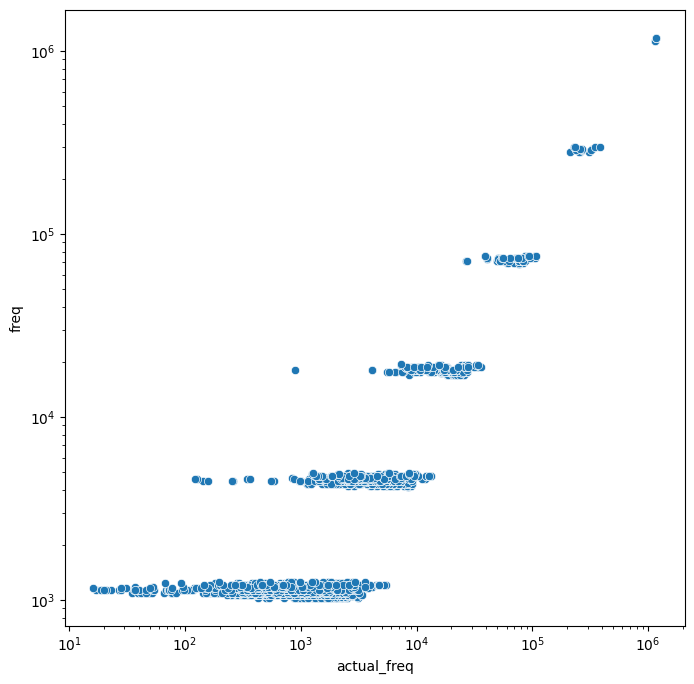

In [46]:
fig, axs = plt.subplots(1, 1, figsize=(8, 8));
sns.scatterplot(data=kmer_frequencies.to_pandas(), x="actual_freq", y="freq", ax=axs);
plt.xscale("log");
plt.yscale("log");